In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.applications.vgg16 import VGG16
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.layers import Flatten, Dense
from keras.models import Sequential
from keras.optimizers import Adam

In [2]:
# Завантажуємо датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)
print("x_test original shape", x_test.shape)
print("y_test original shape", y_test.shape)

x_train original shape (60000, 28, 28)
y_train original shape (60000,)
x_test original shape (10000, 28, 28)
y_test original shape (10000,)


In [3]:
# Змінюємо розмір зображень на 32*32 відповідно до вимог VGG16
x_train = tf.image.resize(np.array(x_train)[..., tf.newaxis], (32, 32))
x_train = np.repeat(x_train, 3, axis=-1)
x_test = tf.image.resize(np.array(x_test)[..., tf.newaxis], (32, 32))
x_test = np.repeat(x_test, 3, axis=-1)

# Змінюємо значення пікселів з (0, 255) до (0, 1)
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0
     

2024-02-17 18:20:55.708740: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2024-02-17 18:20:55.708788: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: ivan-Nitro-AN515-45
2024-02-17 18:20:55.708807: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: ivan-Nitro-AN515-45
2024-02-17 18:20:55.709121: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 525.147.5
2024-02-17 18:20:55.709158: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 470.223.2
2024-02-17 18:20:55.709166: E external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:244] kernel version 470.223.2 does not match DSO version 525.147.5 -- cannot find working devices in this configuratio

In [4]:
# перевіряємо оновлений розмір датасету
x_train.shape, x_test.shape
     

((60000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
# Конвертація Labels в інший формат (one hot encoded)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
# Створюємо основу згортки на базі VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Відключємо навчання шару
conv_base.trainable = False

In [19]:
# Створюємо згорткову нейромережу, що використовує VGG16 як згортковий шар
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [25]:
# Компілюємо модель (підгонка терезів нейромережі)
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

In [26]:
# дізнаємося архітектуру створеної НМ
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [27]:
# навчання нейронної мережі
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    verbose=1,
                    batch_size=64,
                    validation_split=0.2
                    )

Epoch 1/10


2024-02-17 18:23:09.116590: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 589824000 exceeds 10% of free system memory.


750/750 [==============================] - 72s 95ms/step - loss: 0.5625 - accuracy: 0.8035 - val_loss: 0.4511 - val_accuracy: 0.8359
Epoch 2/10
750/750 [==============================] - 71s 95ms/step - loss: 0.4164 - accuracy: 0.8485 - val_loss: 0.4149 - val_accuracy: 0.8491
Epoch 3/10
750/750 [==============================] - 67s 89ms/step - loss: 0.3834 - accuracy: 0.8598 - val_loss: 0.4254 - val_accuracy: 0.8463
Epoch 4/10
750/750 [==============================] - 67s 89ms/step - loss: 0.3585 - accuracy: 0.8684 - val_loss: 0.3880 - val_accuracy: 0.8544
Epoch 5/10
750/750 [==============================] - 67s 89ms/step - loss: 0.3406 - accuracy: 0.8741 - val_loss: 0.3962 - val_accuracy: 0.8569
Epoch 6/10
750/750 [==============================] - 67s 89ms/step - loss: 0.3243 - accuracy: 0.8811 - val_loss: 0.3753 - val_accuracy: 0.8640
Epoch 7/10
750/750 [==============================] - 68s 91ms/step - loss: 0.3127 - accuracy: 0.8842 - val_loss: 0.3704 - val_accuracy: 0.8629
Epo

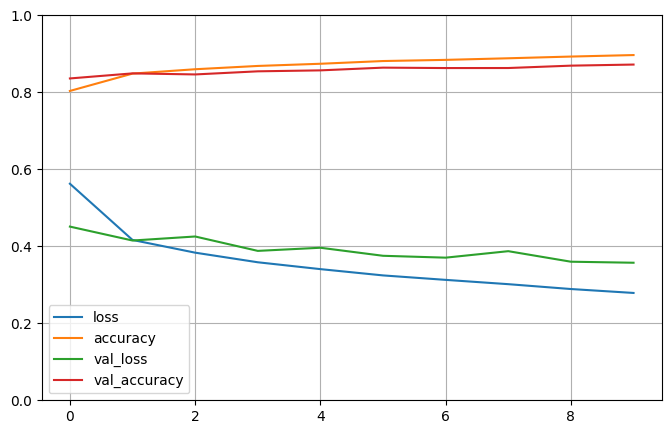

In [28]:
# виведемо графік втрат і точності
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [29]:
# Оцінка якості моделі-1
result = model.evaluate(x_test, y_test)
print(f'відсоток вірних відповідей - {round(result[1] * 100, 1)}%')

313/313 [==============================] - 12s 37ms/step - loss: 0.3689 - accuracy: 0.8670
відсоток вірних відповідей - 86.7%


In [30]:
# Виводимо архітектуру нашої згортної основи
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [31]:
# Зробимо донавчання останніх трьох шарів
for i, layer in enumerate(model.layers):
    layer._name = 'layer_' + str(i)


# conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


modified_model = Sequential([
   conv_base,
   Flatten(),
   Dense(256, activation="relu"),
   Dense(10, activation="softmax"),
])

In [32]:
# Компілюємо модель
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

In [33]:
# навчання нейронної мережі
history_modified = model.fit(
    x_train,
    y_train,
    epochs=5,
    verbose=1,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5


2024-02-17 18:34:46.090048: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 589824000 exceeds 10% of free system memory.


750/750 [==============================] - 305s 406ms/step - loss: 0.3801 - accuracy: 0.8612 - val_loss: 0.3286 - val_accuracy: 0.8763
Epoch 2/5
750/750 [==============================] - 301s 402ms/step - loss: 0.2827 - accuracy: 0.8947 - val_loss: 0.3203 - val_accuracy: 0.8855
Epoch 3/5
750/750 [==============================] - 295s 393ms/step - loss: 0.2509 - accuracy: 0.9070 - val_loss: 0.3143 - val_accuracy: 0.8836
Epoch 4/5
750/750 [==============================] - 291s 388ms/step - loss: 0.2243 - accuracy: 0.9154 - val_loss: 0.2734 - val_accuracy: 0.9001
Epoch 5/5
750/750 [==============================] - 292s 389ms/step - loss: 0.2027 - accuracy: 0.9224 - val_loss: 0.2797 - val_accuracy: 0.9012


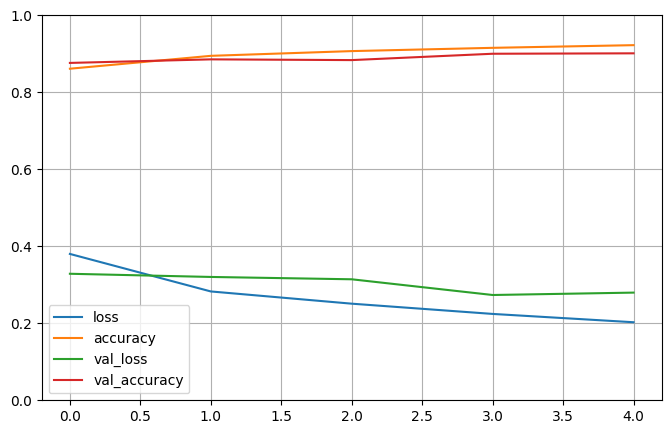

In [34]:
# виведемо графік втрат і точності
pd.DataFrame(history_modified.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [35]:
# Оцінка якості донавченої моделі-1
result_modified = model.evaluate(x_test, y_test)
print(f'відсоток вірних відповідей - {round(result_modified[1] * 100, 1)}%')

313/313 [==============================] - 12s 39ms/step - loss: 0.3072 - accuracy: 0.8937
відсоток вірних відповідей - 89.4%


### Висновок: порівнюючи звичайну згорткову мережу та згорткову мережу, що використовує VGG16 в якості згорткової основи, можемо помітити, що звичайна згортоква мережа показала вищу точність. Навіть з донавчанням трьох останніх шарів в 5 епох, дана створена модель не змогла показати точності звичайної згорткової мережі в 92% якого досягли у моделі-2 в ДЗ-10-1. 